<a href="https://colab.research.google.com/github/skbetz54/Samuel_DATA606/blob/main/Notebooks/Article_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions # used to get rid of contractions (in real-world news articles)
!pip install textblob # used for quantifying polarity of the tweets in the dataset.
!pip install newspaper3k

import pandas as pd
import lxml
from lxml.html import fromstring, tostring

from newspaper import Article
import newspaper
# import BeautifulSoup4 as bs4

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torchtext
import pickle
import contractions

#Preprocessing Functions
from sklearn.utils import shuffle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt') # punkt is a dependency used for nltk's  function "word_tokenize" that does not come when you import nltk
nltk.download('stopwords') # NLTK has a built-in dictionary of stop words that will be used when removing stopwords from the data
nltk.download('averaged_perceptron_tagger') # package that assigns parts of speech, to be used in lemmatization
nltk.download('wordnet') # Added because the above import from corpus sometimes does not work.
from nltk.tag import pos_tag # Another package used in lemmatization to import parts of speech for words

from wordcloud import WordCloud # EDA Tool
from textblob import TextBlob

from google.colab import files, drive

     |████████████████████████████████| 106 kB 9.1 MB/s 
     |████████████████████████████████| 287 kB 48.0 MB/s 
     |████████████████████████████████| 211 kB 5.3 MB/s 
     |████████████████████████████████| 7.4 MB 37.3 MB/s 
     |████████████████████████████████| 93 kB 901 kB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=95b668942d76f1ea0484021d91bbe0ea407aedac86d0ee0febde0a403484e15a
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=aac69a279bcedaaeae450b5429cec1d26856b5daa405719e07096e73f9e7ae9e
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=3e4a1e3d76922f675c32761aab538dd4e

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
open_path_cnn = "/content/gdrive/MyDrive/DATA606/Data/df_cnn_0514.csv"
open_path_fn = "/content/gdrive/MyDrive/DATA606/Data/df_foxnews_0514.csv"

df_cnn = pd.read_csv(open_path_cnn)
df_fn = pd.read_csv(open_path_fn)

df_cnn =df_cnn.drop(columns='Unnamed: 0')
df_fn =df_fn.drop(columns='Unnamed: 0')

In [4]:
df_cnn=df_cnn[['Title','lemma_string']]
df_fn=df_fn[['Title','lemma_string']]

df = pd.concat([df_cnn, df_fn], axis=0)

In [21]:
df.head()

,Title,lemma_string,Site
0,Opinion: It won't be long before extremists in...,julian zelizer cnn political analyst professor...,Cnn
1,Michael Osterholm: Covid-19 keeps firing 210-m...,peter bergen cnn 's national security analyst ...,Cnn
2,Opinion: Katie Porter's example reveals a pivo...,( cnn ) private meeting house democratic caucu...,Cnn
3,Opinion: Why the baby formula shortage is so t...,syra madad dhsc msc mcp infectious disease epi...,Cnn
4,Opinion: Trust in the Supreme Court is grievou...,barbara a. perry gerald l. baliles professor d...,Cnn


## **Model Loading**

In [ ]:
model_best = = nn.Sequential(
    nn.Embedding(vocab_size, D),
    nn.RNN(D, hidden_nodes, batch_first = True),
    LastTimeStep(),
    nn.Linear(hidden_nodes, classes)
)

In [ ]:
statedictpath = r"/content/gdrive/My Drive/DATA606/BasicModels/BestModel/model_best.pt"

loader = torch.load(statedictpath)

loader2 = loader['model_state_dict']

model_best.load_state_dict(loader2)

## **Testing**

Now that our trained model is loaded, all we have to do is predict on each sample.


In [17]:
# Creating a helper dictionary to transform the emotions into numbers (and vice versa)

emotion = ["Fear", "Anger", "Sadness","Joy","Love","Surprise"]

num_to_emotion = {i:emotion[i] for i in range(len(emotion))}
emotion_to_letter = {emotion[i]:i for i in range(len(emotion))}

print(emotion_to_letter)

{'Fear': 0, 'Anger': 1, 'Sadness': 2, 'Joy': 3, 'Love': 4, 'Surprise': 5}


In [ ]:
# Creating a function to predict each individual article

def predict(location, model):
  # Running the input (in this case, a dataframe's row) through the model
  prediction = model(location)
  # Transforming the output into a a softmax function
  prediction = F.softmax(prediction, dim=1) 
  # Getting the index of the max output from the softmax function, which is the class with the highest probability
  output = prediction[0].index(max(prediction[0])) 
  # Using the previous helper function to get the emotion assigned to each integer 
  output = num_to_emotion(output)
  return output

In [ ]:
# Creating a new column that predicts each input value

df['prediction'] = df['lemma_string'].apply(lambda x: predict(x))


df['sentiment'] = df['lemma_string'].apply(lambda x: TextBlob(x).sentiment.polarity)

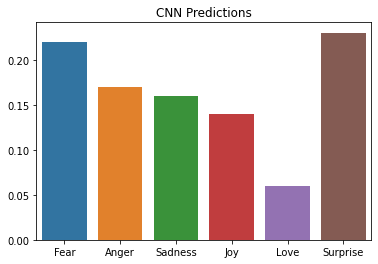

In [32]:
# CNN Output

df_sub = df.loc[df['Site'] == 'Cnn']

cnn_results = df_sub['prediction']

plt.title("CNN Predictions")
sns.barplot(x=emotion,y=cnn_results)
plt.show()

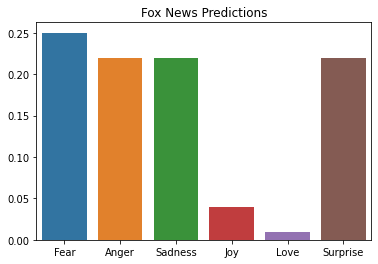

In [25]:
# Fox News Output
df_sub = df.loc[df['Site'] == 'Fox'] 
fn_results = df_sub['prediction']

plt.title("Fox News Predictions")
sns.barplot(x=emotion,y=fn_results)
plt.show()

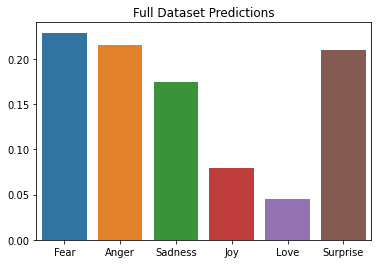

In [45]:
# Full Dataset Output

full_results = df[['prediction']]

plt.title("Full Dataset Predictions")
sns.barplot(x=emotion,y=full_results)
plt.show()